# Мещерякова Ксения

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

###         Датасет содержит данные об уровне работоспособности людей, представляющий его возраст, а также некоторые данные о результатах упражнений.

In [2]:
#открываем файл с данными и выводим на экран
data = pd.read_csv("bodyPerformance.csv", index_col = 0)
data

,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
age,,,,,,,,,,,
27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...
25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A


In [3]:
#Выводим первые 5 записей
data.head()

,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
age,,,,,,,,,,,
27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
#Выводим последние 5 записей
data.tail()

,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
age,,,,,,,,,,,
25.0,M,172.1,71.8,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
21.0,M,179.7,63.9,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
39.0,M,177.2,80.5,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
64.0,F,146.1,57.7,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D
34.0,M,164.0,66.1,19.5,82.0,150.0,35.9,7.1,51.0,180.0,C


In [5]:
data=data.reset_index() 
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [6]:
data['class'].value_counts()

class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64

In [7]:
#Переименовываем названия столбцов
data = data.rename(columns = {'gender' : 'Gender',
'height_cm' : 'Height',
'weight_kg' : 'Weight',
'body fat_%' : 'Fat',
'diastolic' : 'Diastolic',
'systolic' : 'Systolic',
'gripForce' : 'GripForce',
'sit and bend forward_cm' : 'SitAndBend',
'sit-ups counts' : 'SitUps',
'broad jump_cm' : 'Jump',
'class' : 'Class'})

In [8]:
#Описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         13393 non-null  float64
 1   Gender      13393 non-null  object 
 2   Height      13393 non-null  float64
 3   Weight      13393 non-null  float64
 4   Fat         13393 non-null  float64
 5   Diastolic   13393 non-null  float64
 6   Systolic    13393 non-null  float64
 7   GripForce   13393 non-null  float64
 8   SitAndBend  13393 non-null  float64
 9   SitUps      13393 non-null  float64
 10  Jump        13393 non-null  float64
 11  Class       13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


Метод data.info() выводит информацию о данных: названия столбцов, количество ненулевых значений, тип данных и использование памяти В данном датасете все столбцы числового типа данных(float), кроме столбцов "gender" и "class". Они содержат данные типа object

In [9]:
#Статистика данных
data.describe()

,age,Height,Weight,Fat,Diastolic,Systolic,GripForce,SitAndBend,SitUps,Jump
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [10]:
data.columns

Index(['age', 'Gender', 'Height', 'Weight', 'Fat', 'Diastolic', 'Systolic',
       'GripForce', 'SitAndBend', 'SitUps', 'Jump', 'Class'],
      dtype='object')

In [11]:
risk_dictionary_multi_class = {'A':0,'B':1,'C':2,'D':3}
data['Target Multi']=data['Class'].map(risk_dictionary_multi_class)

In [12]:
data[['Class','Target Multi']].head(10)

,Class,Target Multi
0,C,2
1,A,0
2,C,2
3,B,1
4,B,1
5,B,1
6,D,3
7,B,1
8,C,2
9,B,1


In [13]:
X = data.drop(['Class','Gender','Target Multi'],axis=1)
y = data['Target Multi']

In [14]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [15]:
#Разделяем исходный набор данных на обучающую и тестовую выборки, а затем дальнейшее разделе
X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'Train : {X_all_train.shape}, Test : {X_test.shape}')
X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, 
                                                  stratify=y_all_train, test_size = 0.2, 
                                                  random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (10714, 10), Test : (2679, 10)
Train : (8571, 10), Test : (2143, 10)


In [16]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
multi_classifier = Sequential()
multi_classifier.add(Dense(8, activation='relu', input_dim=10))
multi_classifier.add(Dense(4, activation='softmax'))

In [20]:
multi_classifier.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [21]:
#Обучаем модель
multi_classifier_history = multi_classifier.fit(X_train, y_train, batch_size=10, validation_data=(X_val, y_val), epochs=35)

Epoch 1/35
858/858 [==============================] - 9s 7ms/step - loss: 1.3602 - accuracy: 0.3180 - val_loss: 1.2777 - val_accuracy: 0.4312
Epoch 2/35
858/858 [==============================] - 5s 6ms/step - loss: 1.2331 - accuracy: 0.4505 - val_loss: 1.1799 - val_accuracy: 0.4918
Epoch 3/35
858/858 [==============================] - 5s 6ms/step - loss: 1.1502 - accuracy: 0.4838 - val_loss: 1.1100 - val_accuracy: 0.5231
Epoch 4/35
858/858 [==============================] - 5s 6ms/step - loss: 1.0933 - accuracy: 0.4976 - val_loss: 1.0621 - val_accuracy: 0.5399
Epoch 5/35
858/858 [==============================] - 5s 6ms/step - loss: 1.0561 - accuracy: 0.5131 - val_loss: 1.0337 - val_accuracy: 0.5427
Epoch 6/35
858/858 [==============================] - 5s 6ms/step - loss: 1.0302 - accuracy: 0.5255 - val_loss: 1.0114 - val_accuracy: 0.5567
Epoch 7/35
858/858 [==============================] - 5s 6ms/step - loss: 1.0130 - accuracy: 0.5356 - val_loss: 0.9971 - val_accuracy: 0.5576
Epoch 

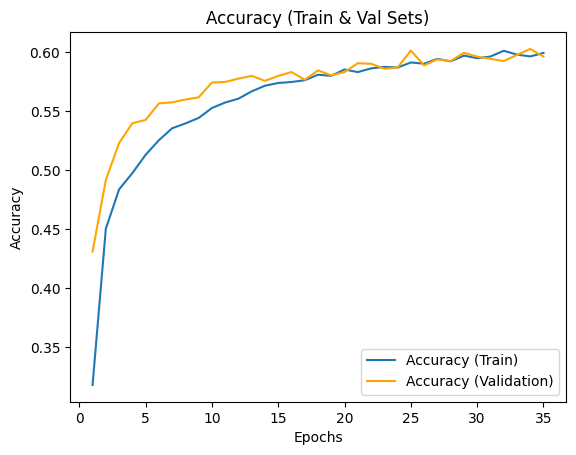

In [22]:
#Cоздаем график точности обучения и валидации для классификатора
acc = multi_classifier_history.history['accuracy']
val_acc = multi_classifier_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
print(y_test[4])

[0. 1. 0. 0.]


In [24]:
#Производим предсказание с помощью обученной модели
x_test_pattern = X_test[4,:]
original_features= min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
print(original_features)

y_pred = multi_classifier.predict(x_test_pattern.reshape(1,-1))
print(y_pred[0])

[[ 23.  181.   93.2  21.3  72.  129.   56.8  25.5  52.  214. ]]
1/1 [==============================] - 0s 199ms/step
[0.37649918 0.39370492 0.1950609  0.03473501]


In [25]:
from sklearn.metrics import roc_curve, auc

# Получение вероятностей принадлежности к каждому классу
y_pred_prob = multi_classifier.predict(X_test)

# Количество классов
n_classes = len(set(y))

84/84 [==============================] - 0s 4ms/step


In [26]:
# Одномерные массивы для хранения значений false positive rate и true positive rate
fpr = dict()
tpr = dict()
roc_auc = dict()

In [27]:
# Рассчитывание ROC-кривых и площадей под кривыми для каждого класса
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

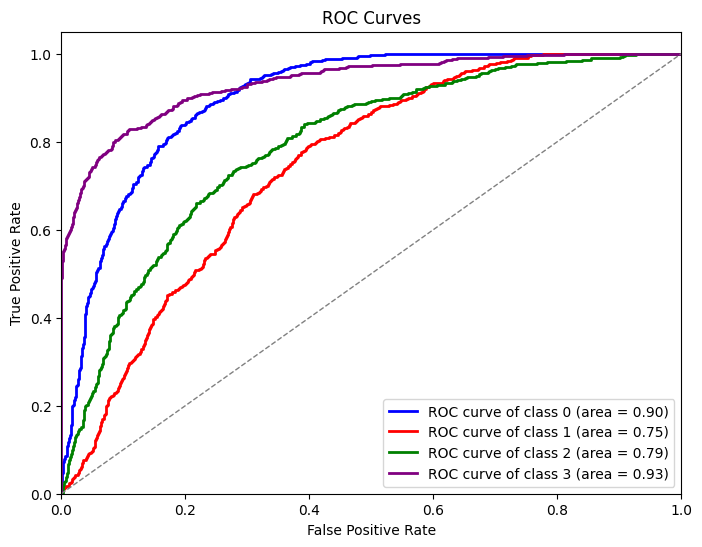

In [28]:
# Построение ROC-кривых для каждого класса
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {} (area = {:0.2f})'.format(i, roc_auc[i]))

# Добавление случайной диагонали
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Настройка осей
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")

plt.show()

In [45]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score

y_pred = np.argmax(multi_classifier.predict(X_test), axis=1)

recall = recall_score(y_test_classes, y_pred, average=None)
precision = precision_score(y_test_classes, y_pred, average=None)
accuracy = accuracy_score(y_test_classes, y_pred)
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

for i in range(n_classes):
    print(f"Class {i} - Recall: {recall[i]}, Precision: {precision[i]}, Accuracy: {accuracy}, AUC: {auc}")

84/84 [==============================] - 0s 4ms/step
Class 0 - Recall: 0.826865671641791, Precision: 0.5944206008583691, Accuracy: 0.6035834266517357, AUC: 0.8432209102905772
Class 1 - Recall: 0.312406576980568, Precision: 0.4475374732334047, Accuracy: 0.6035834266517357, AUC: 0.8432209102905772
Class 2 - Recall: 0.5313432835820896, Precision: 0.5274074074074074, Accuracy: 0.6035834266517357, AUC: 0.8432209102905772
Class 3 - Recall: 0.7432835820895523, Precision: 0.8231404958677686, Accuracy: 0.6035834266517357, AUC: 0.8432209102905772
